In [1]:
from scipy.stats import kstest
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
centroid = pd.read_csv("../../lab/clear_data/centroid.csv", parse_dates=True) 
centroid = centroid[['cluster','variation_population_1','dispo_matiere_grasse_pj_1','dispo_alim_kcal_pj_1','dispo_prot_pj_1']]
centroid

,cluster,variation_population_1,dispo_matiere_grasse_pj_1,dispo_alim_kcal_pj_1,dispo_prot_pj_1
0,1,5.646159,48.062083,2246.000000,55.485000
1,2,3.439805,69.295094,2660.283019,71.720189
2,3,0.641042,95.146818,3057.318182,89.566136
3,4,1.498016,141.085600,3442.280000,108.672400
4,5,12.235104,94.570000,3108.400000,95.644000


In [3]:
c = centroid.copy()
c = c.set_index('cluster')
c

,variation_population_1,dispo_matiere_grasse_pj_1,dispo_alim_kcal_pj_1,dispo_prot_pj_1
cluster,,,,
1,5.646159,48.062083,2246.000000,55.485000
2,3.439805,69.295094,2660.283019,71.720189
3,0.641042,95.146818,3057.318182,89.566136
4,1.498016,141.085600,3442.280000,108.672400
5,12.235104,94.570000,3108.400000,95.644000


<AxesSubplot:ylabel='cluster'>

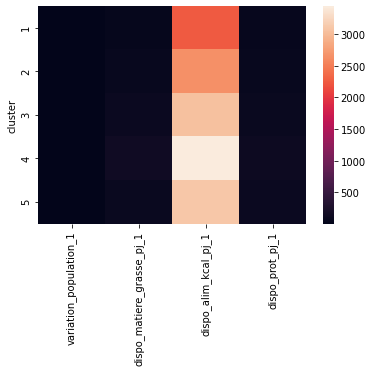

In [4]:
sns.heatmap(c)

In [6]:
data_cluster = pd.read_csv("../../lab/clear_data/centroid.csv", parse_dates=True) 
data_cluster = data_cluster.reset_index()
data_cluster = data_cluster.drop(columns=['Unnamed: 0','index'])
data_cluster

,cluster,variation_population_1,dispo_matiere_grasse_pj_1,dispo_alim_kcal_pj_1,dispo_prot_pj_1
0,1,5.646159,48.062083,2246.000000,55.485000
1,2,3.439805,69.295094,2660.283019,71.720189
2,3,0.641042,95.146818,3057.318182,89.566136
3,4,1.498016,141.085600,3442.280000,108.672400
4,5,12.235104,94.570000,3108.400000,95.644000


In [7]:
df_data_cluster = data_cluster.copy()
df_data_cluster = df_data_cluster.loc[df_data_cluster.index.isin([10,94,75,6,24,78])]
df_data_cluster

,cluster,variation_population_1,dispo_matiere_grasse_pj_1,dispo_alim_kcal_pj_1,dispo_prot_pj_1


In [8]:
data_cluster.loc[data_cluster.cluster == 5 ]

,cluster,variation_population_1,dispo_matiere_grasse_pj_1,dispo_alim_kcal_pj_1,dispo_prot_pj_1
4,5,12.235104,94.57,3108.4,95.644


In [9]:
data_cluster.groupby(['cluster']).describe()

variation_population_1                                       \
                         count       mean std        min        25%   
cluster                                                               
1                          1.0   5.646159 NaN   5.646159   5.646159   
2                          1.0   3.439805 NaN   3.439805   3.439805   
3                          1.0   0.641042 NaN   0.641042   0.641042   
4                          1.0   1.498016 NaN   1.498016   1.498016   
5                          1.0  12.235104 NaN  12.235104  12.235104   

                                         dispo_matiere_grasse_pj_1  \
               50%        75%        max                     count   
cluster                                                              
1         5.646159   5.646159   5.646159                       1.0   
2         3.439805   3.439805   3.439805                       1.0   
3         0.641042   0.641042   0.641042                       1.0   
4         1.498016   1.498016   1.498016                       1.0   
5        12.235104  12.235104  12.235104                       1.0   

                     ... dispo_alim_kcal_pj_1              dispo_prot_pj_1  \
               mean  ...                  75%          max           count   
cluster              ...                                                     
1         48.062083  ...          2246.000000  2246.000000             1.0   
2         69.295094  ...          2660.283019  2660.283019             1.0   
3         95.146818  ...          3057.318182  3057.318182             1.0   
4        141.085600  ...          3442.280000  3442.280000             1.0   
5         94.570000  ...          3108.400000  3108.400000             1.0   

                                                                         \
               mean std         min         25%         50%         75%   
cluster                                                                   
1         55.485000 NaN   55.485000   55.485000   55.485000   55.485000   
2         71.720189 NaN   71.720189   71.720189   71.720189   71.720189   
3         89.566136 NaN   89.566136   89.566136   89.566136   89.566136   
4        108.672400 NaN  108.672400  108.672400  108.672400  108.672400   
5         95.644000 NaN   95.644000   95.644000   95.644000   95.644000   

                     
                max  
cluster              
1         55.485000  
2         71.720189  
3         89.566136  
4        108.672400  
5         95.644000  

[5 rows x 32 columns]

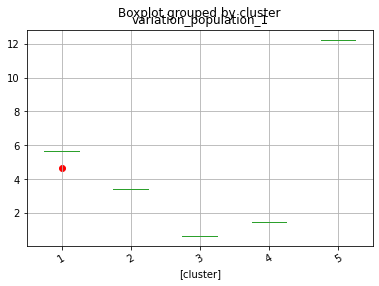

In [12]:
#plt.figure(figsize=(20, 20))
#plt.subplot(2, 2, 1)
#plt.title('variation population / clusters')
data_cluster[['variation_population_1','cluster']].boxplot(by='cluster')

plt.scatter(x=1, y=data_cluster['variation_population_1'].mean(), color='red')
plt.tick_params(axis='x', labelrotation=30)

In [ ]:
data_cluster[['variation_population','cluster']].groupby(['cluster']).mean()

In [ ]:
for i in data_cluster.columns: 
    v = display(data_cluster[[i,'cluster']].groupby(['cluster']).describe())
    print(v)
    